# Ejemplo de una RNN para una Onda Sinusoidal

In [1]:
import pandas as pd
import numpy as np

# Si se desea usar matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Si se desea usar Plotly Express
import plotly.offline as py
py.init_notebook_mode(connected = True)  # para que funcione bien con Jupyter Notebook
import plotly.graph_objs as go
import plotly.express as px

## Datos

Usaremos Numpy para crear una onda sinusoidal simple.

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [3]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

### Visualizar los datos

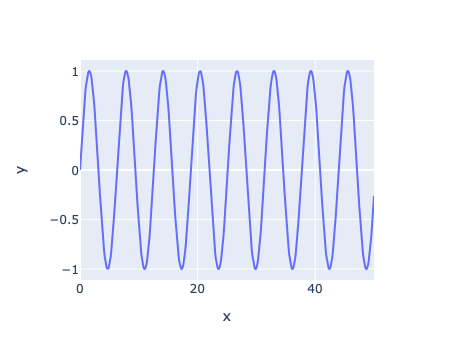

In [5]:
px.line(x = x, y = y)

Convertir los datos a un DataFrame

In [6]:
df = pd.DataFrame(data = y, index = x, columns = ['Seno'])

In [7]:
df

,Seno
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## División Train-Test

Nota! Esto es muy diferente a la metodología que hemos usado antes!

In [8]:
len(df)

501

In [9]:
pct_prueba = 0.1

In [10]:
len(df) * pct_prueba

50.1

In [11]:
punto_prueba = np.round(len(df) * pct_prueba)

In [12]:
prueba_indiv = int(len(df) - punto_prueba)

In [13]:
prueba_indiv

451

In [14]:
entreno = df.iloc[:prueba_indiv]
prueba = df.iloc[prueba_indiv:]

In [15]:
entreno

,Seno
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [16]:
prueba

,Seno
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Escalar los Datos 

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
escalador = MinMaxScaler()

In [19]:
escalador.fit(entreno)

MinMaxScaler()

In [20]:
entreno_escalado = escalador.transform(entreno)
prueba_escalado = escalador.transform(prueba)

# Generador de Series de TiempoTime Serie

Esta clase recibe una secuencia de observaciones tomadas a intervalos iguales, junto con parámetros de series de tiempo como: paso, longitud de historia, etc., y produce tandas de secuencias para entrenamiento y validación de los modelos.

#### Argumentos (tomados de la documentación)
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [21]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
# entreno_escalado

In [23]:
# definr generador
longitud = 2 # Longitud de las secuencias de salida (número de pasos de tiempo)
tamanio_tanda = 1 # Número de muestras de serie de tiempo en cada tanda
generador = TimeseriesGenerator(entreno_escalado, 
                                entreno_escalado, 
                                length = longitud, 
                                batch_size = tamanio_tanda)

In [24]:
len(entreno_escalado)

451

In [25]:
len(generador) # n_entrada = 2

449

In [26]:
# entreno_escalado

In [27]:
# Cómo se vé la primera tanda?
X,y = generador[0]

In [28]:
print(f'Dado el arreglo: \n{X.flatten()}')
print(f'Predecir esta y: \n {y}')

Dado el arreglo: 
[0.49999912 0.54991622]
Predecir esta y: 
 [[0.59933458]]


In [29]:
# Se redefine para obtener 10 pasos hacia atras
#      y luego predecir el siguiente paso
longitud = 10 # Longitud de las secuencias de salida (en número de pasos de tiempo)
generador = TimeseriesGenerator(entreno_escalado, 
                                entreno_escalado, 
                                length = longitud, 
                                batch_size = 1)

In [30]:
# Cómo se ve la primera tanda?
X,y = generador[0]

In [31]:
print(f'Dado el arreglo: \n{X.flatten()}')
print(f'Predecir esta y: \n {y}')

Dado el arreglo: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predecir esta y: 
 [[0.92073798]]


In [32]:
longitud = 50 # Longitud de las secuencias de salida (en número de pasos de tiempo)
generador = TimeseriesGenerator(entreno_escalado, 
                                entreno_escalado, 
                                length = longitud, 
                                batch_size = 1)

Ahora se podrá editar la longitud para que tenga sentido para la serie de tiempo que se esté trabajando!

### Crear el Modelo

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [34]:
# Solo tenemos una variable (feature)
n_features = 1

In [35]:
# definir el modelo
modelo = Sequential()

# Una capa simple de RNN
modelo.add(SimpleRNN(50, input_shape = (longitud, 
                                        n_features)))

# Predicción Final
modelo.add(Dense(1))

modelo.compile(optimizer = 'adam', loss = 'mse')

2021-10-11 10:27:45.795173: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-11 10:27:45.807853: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [36]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Ajustar el modelo...ojo!!!...no a los datos 
#     originales, sino a las tandas generadas 
modelo.fit_generator(generador, epochs = 5)

Epoch 1/5
401/401 [==============================] - 164s 409ms/step - loss: 0.0121
Epoch 2/5
401/401 [==============================] - 180s 449ms/step - loss: 6.3021e-05
Epoch 3/5
401/401 [==============================] - 176s 440ms/step - loss: 6.0116e-04
Epoch 4/5
401/401 [==============================] - 184s 460ms/step - loss: 4.6721e-04
Epoch 5/5
401/401 [==============================] - 201s 501ms/step - loss: 1.1371e-05


In [38]:
modelo.history.history.keys()

dict_keys(['loss'])

<AxesSubplot:>

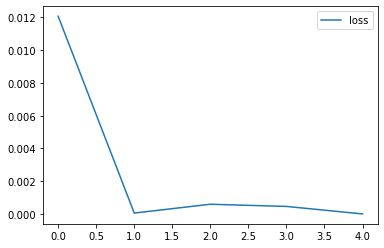

In [39]:
perdidas = pd.DataFrame(modelo.history.history)
perdidas.plot()

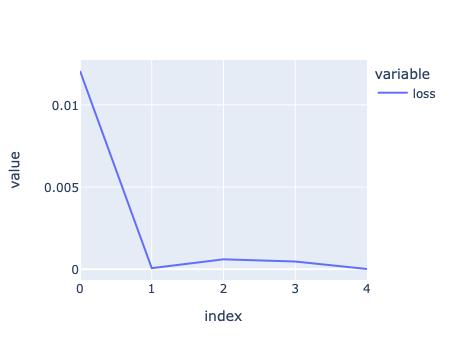

In [40]:
px.line(perdidas)

## Evaluar con los datos de Prueba

In [45]:
primera_tanda_eval = entreno_escalado[-longitud:]

In [46]:
primera_tanda_eval

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [47]:
primera_tanda_eval = primera_tanda_eval.reshape((1, longitud,
                                                 n_features))

In [48]:
modelo.predict(primera_tanda_eval)

array([[0.95025927]], dtype=float32)

In [50]:
prueba_escalado[0]

array([0.94955134])

Se usa la lógica anterior en una iteración para predecir hacia el futuro parar el rango entero de prueba.

----

In [51]:
predicciones_prueba = []

primera_tanda_eval = entreno_escalado[-longitud:]
tanda_actual = primera_tanda_eval.reshape((1,
                                           longitud, 
                                           n_features))

In [52]:
tanda_actual.shape

(1, 50, 1)

In [53]:
tanda_actual

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [54]:
# agregar el valor 99 a la tanda, y botar el primer
#   valor...OJO con los índices
np.append(tanda_actual[:, 1:, :], [[[99]]], axis = 1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

**NOTA:  FIJARSE BIEN EN LO QUE SE ESTA PRODUCIENDO; Y EN QUE DIMENSIONES.  AGREGUE SUS PROPIAS INSTRUCCIONES DE SALIDA (print()), PARA VER REALMENTE QUE ES LO QUE ESTA PASANDO!!**

In [55]:
prediciones_prueba = []

primera_tanda_eval = entreno_escalado[-longitud:]
tanda_actual = primera_tanda_eval.reshape((1, 
                                           longitud, 
                                           n_features))

for i in range(len(prueba)):
    
    # obtener la predicción de 1 paso de tiempo 
    #     adelante ([0] es para tomar solo el
    #     número en vez de un [arreglo])
    prediccion_actual = modelo.predict(tanda_actual)[0]
    
    # guardar la predicción
    predicciones_prueba.append(prediccion_actual) 
    
    # actualizar la tanda para que ahora incluya
    #     la predicción, y eliminar el primer valor
    tanda_actual = np.append(tanda_actual[:, 1: ,:],
                             [[prediccion_actual]], 
                             axis = 1)

In [56]:
predicciones_prueba

[array([0.95025927], dtype=float32),
 array([0.9697761], dtype=float32),
 array([0.9847838], dtype=float32),
 array([0.9950508], dtype=float32),
 array([0.9999576], dtype=float32),
 array([0.9998745], dtype=float32),
 array([0.99458903], dtype=float32),
 array([0.9841133], dtype=float32),
 array([0.96873164], dtype=float32),
 array([0.9483813], dtype=float32),
 array([0.92338264], dtype=float32),
 array([0.8942981], dtype=float32),
 array([0.8610639], dtype=float32),
 array([0.82447153], dtype=float32),
 array([0.78497547], dtype=float32),
 array([0.7425329], dtype=float32),
 array([0.6981485], dtype=float32),
 array([0.6518962], dtype=float32),
 array([0.60402656], dtype=float32),
 array([0.5552373], dtype=float32),
 array([0.5056987], dtype=float32),
 array([0.45575428], dtype=float32),
 array([0.40622133], dtype=float32),
 array([0.35714516], dtype=float32),
 array([0.30925617], dtype=float32),
 array([0.26341486], dtype=float32),
 array([0.21960782], dtype=float32),
 array([0.17875

In [57]:
prueba_escalado

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Transformación Inversa (para que los valores se parezcan a los datos originales) y Comparar

In [58]:
predicciones_reales = escalador.inverse_transform(predicciones_prueba)

In [59]:
predicciones_reales

array([[ 0.90051308],
       [ 0.93954642],
       [ 0.96956164],
       [ 0.9900954 ],
       [ 0.99990899],
       [ 0.99974269],
       [ 0.98917189],
       [ 0.96822055],
       [ 0.93745753],
       [ 0.89675718],
       [ 0.84676025],
       [ 0.78859159],
       [ 0.72212377],
       [ 0.64893963],
       [ 0.56994813],
       [ 0.48506369],
       [ 0.39629557],
       [ 0.30379169],
       [ 0.20805321],
       [ 0.11047547],
       [ 0.01139904],
       [-0.08848896],
       [-0.18755407],
       [-0.28570562],
       [-0.38148284],
       [-0.47316471],
       [-0.5607781 ],
       [-0.64248683],
       [-0.71724756],
       [-0.78532458],
       [-0.84469081],
       [-0.89546315],
       [-0.93772062],
       [-0.96956926],
       [-0.99212888],
       [-1.00506794],
       [-1.0067986 ],
       [-0.99964578],
       [-0.98217813],
       [-0.95416795],
       [-0.91851056],
       [-0.87272209],
       [-0.8183246 ],
       [-0.75756656],
       [-0.68734814],
       [-0

In [60]:
prueba

,Seno
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [61]:
# IGNORAR LAS ADVERTENCIAS (son para que se sepa que
#     se está por "caerle" encima con una modificación
#     a los datos originales
prueba['Predicciones'] = predicciones_reales

/Users/furlan/opt/anaconda3/envs/py3-tf2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
prueba

,Seno,Predicciones
45.1,0.899097,0.900513
45.2,0.938307,0.939546
45.3,0.968142,0.969562
45.4,0.988304,0.990095
45.5,0.998591,0.999909
45.6,0.998900,0.999743
45.7,0.989229,0.989172
45.8,0.969673,0.968221
45.9,0.940429,0.937458
46.0,0.901788,0.896757


<AxesSubplot:>

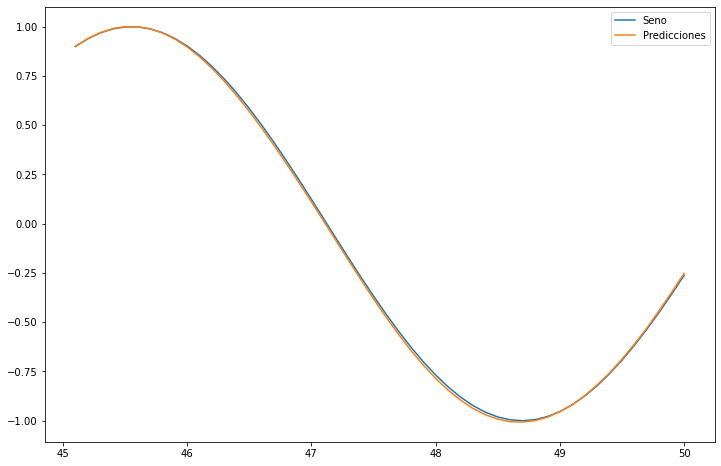

In [63]:
prueba.plot(figsize = (12, 8))

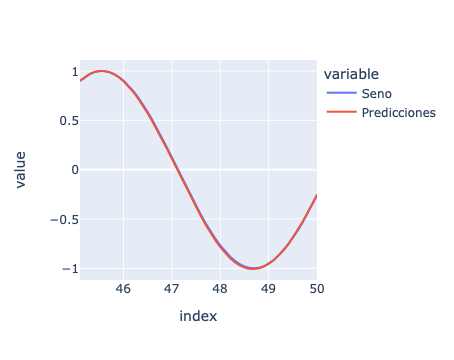

In [65]:
px.line(prueba)

## Ahora se agrega la detención temprana "Early Stopping" y un generador para validación

In [102]:
from tensorflow.keras.callbacks import EarlyStopping

In [103]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)

In [104]:
longitud = 49
generador = TimeseriesGenerator(entreno_escalado,
                                entreno_escalado,
                                length = longitud,
                                batch_size = 1)


generador_validacion = TimeseriesGenerator(prueba_escalado,
                                           prueba_escalado,
                                           length = longitud,
                                           batch_size = 1)

# LSTM

In [110]:
# definir modelo
modelo = Sequential()

# Capa simple de RNN
modelo.add(LSTM(50, 
            input_shape = (longitud, n_features)))

# Predicción Final
modelo.add(Dense(1))

modelo.compile(optimizer = 'adam', loss = 'mse')

In [111]:
modelo.fit_generator(generador, epochs = 20,
                    validation_data = generador_validacion,
                    callbacks = [early_stop])

Epoch 1/20
402/402 [==============================] - 380s 946ms/step - loss: 0.0169 - val_loss: 4.6719e-05
Epoch 2/20
402/402 [==============================] - 564s 1s/step - loss: 2.9389e-04 - val_loss: 8.4742e-05
Epoch 3/20
402/402 [==============================] - 579s 1s/step - loss: 7.8454e-04 - val_loss: 4.3301e-05
Epoch 4/20
402/402 [==============================] - 608s 2s/step - loss: 1.4414e-04 - val_loss: 1.3775e-05
Epoch 5/20
402/402 [==============================] - 589s 1s/step - loss: 7.0051e-05 - val_loss: 2.2980e-05
Epoch 6/20
402/402 [==============================] - 586s 1s/step - loss: 8.7615e-05 - val_loss: 1.7155e-05


In [112]:
predicciones_prueba = []

primera_tanda_eval = entreno_escalado[-longitud:]
tanda_actual = primera_tanda_eval.reshape((1, 
                                           longitud, 
                                           n_features))

for i in range(len(prueba)):
    
    # obtener predicción 1 paso de tiempo adelante
    #    ([0] es para tomar solo el número y no
    #.   todo el [arreglo])
    prediccion_actual = modelo.predict(tanda_actual)[0]
    
    # guardar la predicción
    predicciones_prueba.append(prediccion_actual) 
    
    # actualizar la tanda para que incluya la nueva
    #    predicción, y eliminar el primer dato
    tanda_actual = np.append(tanda_actual[:, 1:, :],
                             [[prediccion_actual]],
                             axis = 1)

2021-10-11 15:48:26.129581: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_28093210' and '__inference_standard_lstm_28093210_specialized_for_sequential_6_lstm_5_StatefulPartitionedCall_at___inference_distributed_function_28093512' both implement 'lstm_0a513dcf-8f6c-43dc-a8ad-b0cb6f5a7443' but their signatures do not match.


/Users/furlan/opt/anaconda3/envs/py3-tf2/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

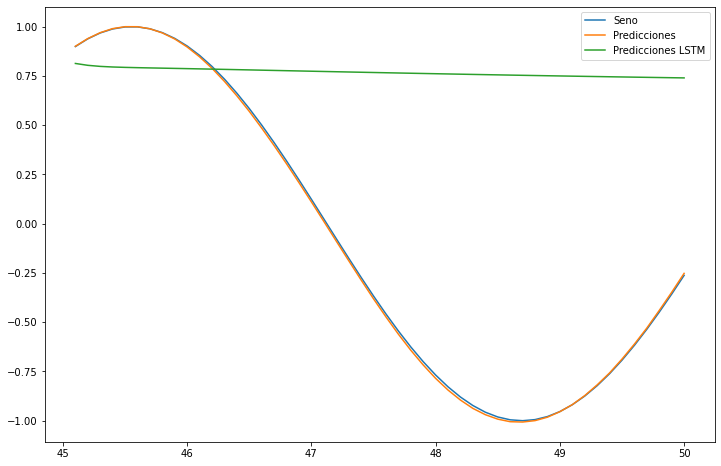

In [108]:
# IGNORAR ADVERTENCIAS
predicciones_reales = escalador.inverse_transform(predicciones_prueba)
prueba['Predicciones LSTM'] = predicciones_reales
prueba.plot(figsize = (12, 8))

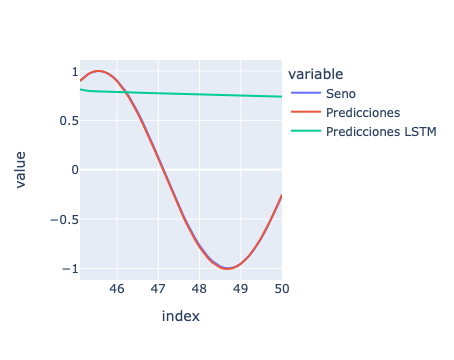

In [109]:
px.line(prueba)

# Predicciones hacia el futuro (lo desconocido)

Ahora se utilizarán todos los datos!

In [75]:
escalador_completo = MinMaxScaler()
todos_datos_escalados = escalador_completo.fit_transform(df)

In [77]:
longitud = 50 # Longitud de las secuencias de salida
               # (dada en n número de pasos de tiempo)
generador = TimeseriesGenerator(todos_datos_escalados, 
                                todos_datos_escalados, 
                                length = longitud, 
                                batch_size = 1)

In [78]:
modelo = Sequential()
modelo.add(LSTM(50, input_shape = (longitud, 
                                   n_features)))
modelo.add(Dense(1))
modelo.compile(optimizer = 'adam', loss = 'mse')
modelo.fit_generator(generador, epochs = 6)

Epoch 1/6
451/451 [==============================] - 644s 1s/step - loss: 0.0110
Epoch 2/6
451/451 [==============================] - 689s 2s/step - loss: 1.1119e-04
Epoch 3/6
451/451 [==============================] - 692s 2s/step - loss: 9.6163e-05
Epoch 4/6
451/451 [==============================] - 409s 907ms/step - loss: 7.5060e-05
Epoch 5/6
451/451 [==============================] - 412s 913ms/step - loss: 1.5969e-04
Epoch 6/6
451/451 [==============================] - 455s 1s/step - loss: 2.7315e-04


In [91]:
pred_al_futuro = []

primera_tanda_eval = todos_datos_escalados[-longitud:]
tanda_actual = primera_tanda_eval.reshape((1, 
                                           longitud, 
                                           n_features))

for i in range(len(prueba)):
    
    # obtener predicción 1 paso de tiempo adelante
    #    ([0] es para tomar solo el número en vez de
    #     todo el [arreglo])
    prediccion_actual = modelo.predict(tanda_actual)[0]
    
    # guardar la predicción
    pred_al_futuro.append(prediccion_actual) 
    
    # actualizar la tanda parea incluir la nueva
    #    predicción y eliminar el primer dato
    tanda_actual = np.append(tanda_actual[:, 1:, :],
                             [[prediccion_actual]],
                             axis = 1)

In [92]:
pred_al_futuro = escalador.inverse_transform(pred_al_futuro)

In [93]:
# pred_al_futuro

In [94]:
df

,Seno
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [95]:
len(pred_al_futuro)

50

In [96]:
50 * 0.1

5.0

In [97]:
indice_pred_al_futuro = np.arange(50.1, 55.1, step = 0.1)

In [98]:
len(indice_pred_al_futuro)

50

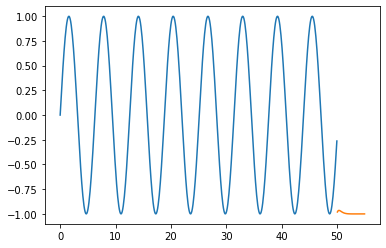

In [99]:
plt.plot(df.index,df['Seno'])
plt.plot(indice_pred_al_futuro,pred_al_futuro)

# FIN!

In [90]:
pred_al_futuro

array([[-0.98059884],
       [-0.97025581],
       [-0.96553858],
       [-0.96468227],
       [-0.96617703],
       [-0.96899704],
       [-0.97245538],
       [-0.97610438],
       [-0.97966409],
       [-0.98297078],
       [-0.98593974],
       [-0.98853864],
       [-0.99076854],
       [-0.99265062],
       [-0.99421698],
       [-0.99550453],
       [-0.99655103],
       [-0.99739261],
       [-0.99806248],
       [-0.9985902 ],
       [-0.9990015 ],
       [-0.9993184 ],
       [-0.99955948],
       [-0.9997402 ],
       [-0.9998733 ],
       [-0.9999692 ],
       [-1.00003632],
       [-1.00008142],
       [-1.00010988],
       [-1.00012596],
       [-1.00013299],
       [-1.00013354],
       [-1.00012961],
       [-1.0001227 ],
       [-1.00011393],
       [-1.00010415],
       [-1.00009396],
       [-1.00008377],
       [-1.00007388],
       [-1.00006448],
       [-1.00005568],
       [-1.00004753],
       [-1.00004005],
       [-1.00003322],
       [-1.00002702],
       [-1